# Atualização: Pacote Python, Pandas

In [ ]:
!python -m pip install SomePackage

  Created wheel for SomePackage: filename=somepackage-1.2.3-py3-none-any.whl size=9293 sha256=4bc65dbac6c31b7daf2dd06a639a3473d4f6c80f204fe9b8df9b28b3f5c69bca
  Stored in directory: /root/.cache/pip/wheels/ac/60/3d/195deb8ad5768f322df5510ff4f686233d29243c709dc563ba
Successfully built SomePackage


In [ ]:
!pip install pandas==1.3.1

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt

In [ ]:
print(pd.__version__)

1.1.5


# Informações gerais do Dataset

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Dataset/Coursera K-means/_happyscore_income.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country                111 non-null    object 
 1   adjusted_satisfaction  111 non-null    float64
 2   avg_satisfaction       111 non-null    float64
 3   std_satisfaction       111 non-null    float64
 4   avg_income             111 non-null    float64
 5   median_income          111 non-null    float64
 6   income_inequality      111 non-null    float64
 7   region                 111 non-null    object 
 8   happyScore             111 non-null    float64
 9   GDP                    111 non-null    float64
 10  country.1              111 non-null    object 
dtypes: float64(8), object(3)
memory usage: 9.7+ KB


In [ ]:
df.head()

,country,adjusted_satisfaction,avg_satisfaction,std_satisfaction,avg_income,median_income,income_inequality,region,happyScore,GDP,country.1
0,Armenia,37.0,4.9,2.42,2096.76,1731.506667,31.445556,'Central and Eastern Europe',4.350,0.76821,Armenia
1,Angola,26.0,4.3,3.19,1448.88,1044.240000,42.720000,'Sub-Saharan Africa',4.033,0.75778,Angola
2,Argentina,60.0,7.1,1.91,7101.12,5109.400000,45.475556,'Latin America and Caribbean',6.574,1.05351,Argentina
3,Austria,59.0,7.2,2.11,19457.04,16879.620000,30.296250,'Western Europe',7.200,1.33723,Austria
4,Australia,65.0,7.6,1.80,19917.00,15846.060000,35.285000,'Australia and New Zealand',7.284,1.33358,Australia


# Verificação de valores faltantes

In [ ]:
df.isnull().sum()

country                  0
adjusted_satisfaction    0
avg_satisfaction         0
std_satisfaction         0
avg_income               0
median_income            0
income_inequality        0
region                   0
happyScore               0
GDP                      0
country.1                0
dtype: int64



> **Não valores faltantes nesse dataset**



# Observação das colunas de renda, felicidade e disgualdade de renda

In [ ]:
happy=df['happyScore']
income=df['avg_income']
disparidade=df['income_inequality']

In [ ]:
happy.describe()

count    111.000000
mean       5.421910
std        1.180801
min        2.839000
25%        4.568000
50%        5.268000
75%        6.392000
max        7.587000
Name: happyScore, dtype: float64

In [ ]:
income.describe()

count      111.000000
mean      6442.751416
std       6479.533692
min        572.880000
25%       1519.388684
50%       3889.320000
75%       7867.402500
max      26182.275000
Name: avg_income, dtype: float64

In [ ]:
disparidade.describe()

count    111.000000
mean      38.417805
std        8.375557
min       24.215000
25%       32.182857
50%       36.480000
75%       43.380000
max       63.726667
Name: income_inequality, dtype: float64

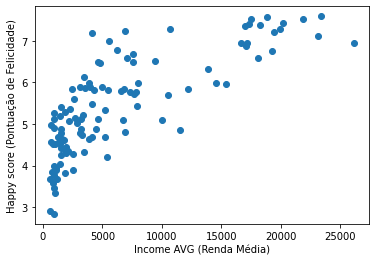

In [ ]:
plt.xlabel('Income AVG (Renda Média)')
plt.ylabel('Happy score (Pontuação de Felicidade)')
plt.scatter(income,happy)

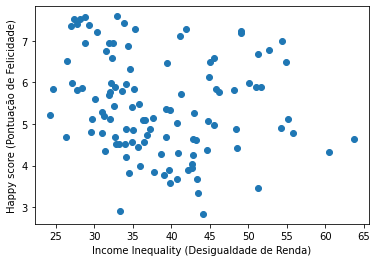

In [ ]:
plt.xlabel('Income Inequality (Desigualdade de Renda)')
plt.ylabel('Happy score (Pontuação de Felicidade)')
plt.scatter(disparidade,happy)

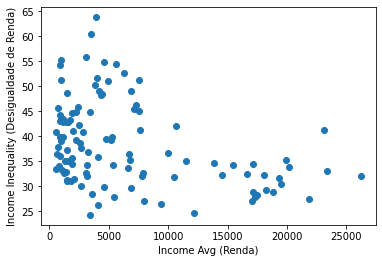

In [ ]:
plt.xlabel('Income Avg (Renda)')
plt.ylabel('Income Inequality (Desigualdade de Renda)')
plt.scatter(income,disparidade)

# Organização do dataset a partir da renda dos países (ASC)

In [ ]:
df.sort_values('avg_income', inplace=True)
df

,country,adjusted_satisfaction,avg_satisfaction,std_satisfaction,avg_income,median_income,income_inequality,region,happyScore,GDP,country.1
10,Burundi,25.0,2.9,1.96,572.880,436.92,33.360000,'Sub-Saharan Africa',2.905,0.01530,Burundi
65,Madagascar,33.0,3.7,1.86,574.200,415.48,40.720000,'Sub-Saharan Africa',3.681,0.20824,Madagascar
58,Liberia,37.0,4.4,2.02,653.040,528.72,36.480000,'Sub-Saharan Africa',4.571,0.07120,Liberia
72,Mozambique,34.0,3.8,1.76,714.720,488.52,45.580000,'Sub-Saharan Africa',4.971,0.08308,Mozambique
73,Niger,34.0,3.8,1.75,718.400,535.56,37.726667,'Sub-Saharan Africa',3.845,0.06940,Niger
...,...,...,...,...,...,...,...,...,...,...,...
16,Canada,69.0,8.0,1.71,20190.780,16829.10,33.790000,'North America',7.427,1.32629,Canada
77,Norway,70.0,8.0,1.62,21877.710,19477.62,27.307500,'Western Europe',7.522,1.45900,Norway
105,United States,62.0,7.3,1.92,23127.000,17925.36,41.090000,'North America',7.119,1.39451,United States
17,Switzerland,70.0,8.0,1.62,23400.040,19442.92,32.930000,'Western Europe',7.587,1.39651,Switzerland


# Separando as informações dos países mais ricos

In [ ]:
richest=df[ df['avg_income'] > 15000 ]
richest

,country,adjusted_satisfaction,avg_satisfaction,std_satisfaction,avg_income,median_income,income_inequality,region,happyScore,GDP,country.1
49,Italy,57.0,6.6,1.81,15437.595000,13163.070000,34.126250,'Western Europe',5.948,1.25114,Italy
44,Ireland,64.0,7.5,1.85,16657.770000,13823.160000,32.418750,'Western Europe',6.940,1.33596,Ireland
90,Sweden,67.0,7.8,1.72,17032.755000,15166.605000,26.950000,'Western Europe',7.364,1.33171,Sweden
36,United Kingdom,60.0,7.1,1.98,17099.550000,14172.735000,34.432500,'Western Europe',6.867,1.26637,United Kingdom
7,Belgium,63.0,7.2,1.72,17168.505000,15166.455000,28.745000,'Western Europe',6.937,1.30782,Belgium
33,Finland,70.0,7.9,1.53,17310.195000,14962.560000,27.723750,'Western Europe',7.406,1.29025,Finland
27,Denmark,74.0,8.4,1.53,17496.510000,15630.885000,28.155000,'Western Europe',7.527,1.32548,Denmark
34,France,52.0,6.4,2.15,18096.788571,14971.251429,32.255714,'Western Europe',6.575,1.27778,France
76,Netherlands,69.0,7.6,1.38,18234.435000,15880.545000,29.271250,'Western Europe',7.378,1.32944,Netherlands
48,Iceland,71.0,8.1,1.64,18828.345000,16179.315000,28.780000,'Western Europe',7.561,1.30232,Iceland


# Comparação de métricas entre Richest e o DF

In [ ]:
all_mean=np.mean(df['avg_income'])
all_max=np.max(df['avg_income'])

rich_mean=np.mean(richest['avg_income'])
rich_max=np.max(richest['avg_income'])

In [ ]:
print(f'{all_mean} Média da renda geral')
print(f'{rich_mean} Média da renda dos países mais ricos (acima de 15000) ')

6442.751416214639 Média da renda geral
19266.680753968256 Média da renda dos países mais ricos (acima de 15000) 


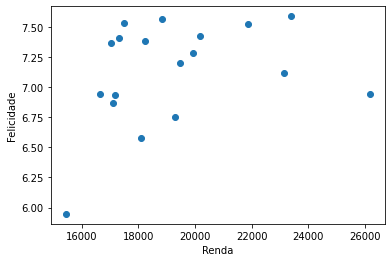

In [ ]:
plt.xlabel('Renda')
plt.ylabel('Felicidade')
plt.scatter(richest['avg_income'], richest['happyScore'])

Text(23127.0, 7.119, 'United States')

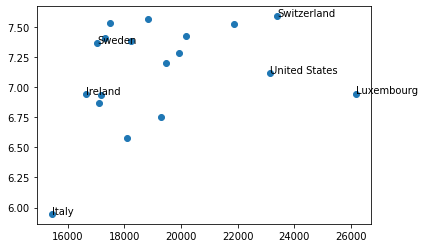

In [ ]:
plt.scatter(richest['avg_income'], richest['happyScore'])

# Top 3 países menos ricos do grupo dos países ricos
plt.text(richest.iloc[0] ['avg_income'],
         richest.iloc[0] ['happyScore'],
         richest.iloc[0] ['country']
         )
plt.text(richest.iloc[1] ['avg_income'],
         richest.iloc[1] ['happyScore'],
         richest.iloc[1] ['country']
         )
plt.text(richest.iloc[2] ['avg_income'],
         richest.iloc[2] ['happyScore'],
         richest.iloc[2] ['country']
         )

# Top 3 países mais ricos do grupo dos países ricos

plt.text(richest.iloc[-1] ['avg_income'],
         richest.iloc[-1] ['happyScore'],
         richest.iloc[-1] ['country']
         )

plt.text(richest.iloc[-2] ['avg_income'],
         richest.iloc[-2] ['happyScore'],
         richest.iloc[-2] ['country']
         )

plt.text(richest.iloc[-3] ['avg_income'],
         richest.iloc[-3] ['happyScore'],
         richest.iloc[-3] ['country']
         )

In [ ]:
for i,row in richest.iterrows():
  print(row['country'])

Italy
Ireland
Sweden
United Kingdom
Belgium
Finland
Denmark
France
Netherlands
Iceland
Germany
Austria
Australia
Canada
Norway
United States
Switzerland
Luxembourg


Agora vamos automatizar a nomeação dos pontos existentes no gráficos

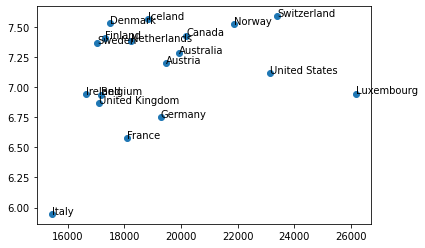

In [ ]:
plt.scatter(richest['avg_income'], richest['happyScore'])

for i,row in richest.iterrows():
  #print(row['country'])
  plt.text(row ['avg_income'],
          row ['happyScore'],
          row ['country']
          )

# Relação entre renda, felicidade e desigualdade de renda



> Podemos dividir os países em 3 grupos :


*   Alta renda e felicidade
*   Baixa renda e Alta felicidade
*   Baixa Renda e Baixa felicidade





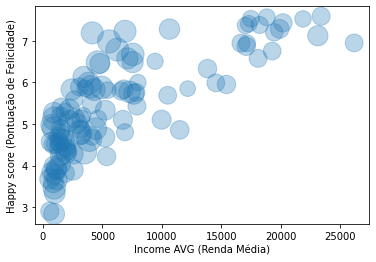

In [ ]:
plt.xlabel('Income AVG (Renda Média)')
plt.ylabel('Happy score (Pontuação de Felicidade)')
plt.scatter(income,happy, s=disparidade*10, alpha=0.30)

# K-Means

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
income_happy=np.column_stack((income,happy))
print(income_happy)

[[5.72880000e+02 2.90500000e+00]
 [5.74200000e+02 3.68100000e+00]
 [6.53040000e+02 4.57100000e+00]
 [7.14720000e+02 4.97100000e+00]
 [7.18400000e+02 3.84500000e+00]
 [8.50080000e+02 4.50700000e+00]
 [8.70840000e+02 3.58700000e+00]
 [9.03300000e+02 3.99500000e+00]
 [9.08640000e+02 4.89800000e+00]
 [9.10320000e+02 5.26800000e+00]
 [9.36360000e+02 2.83900000e+00]
 [9.41400000e+02 3.78100000e+00]
 [9.46520000e+02 3.46500000e+00]
 [9.56760000e+02 5.12900000e+00]
 [9.89040000e+02 3.34000000e+00]
 [1.05072000e+03 4.51200000e+00]
 [1.12648000e+03 3.93100000e+00]
 [1.13508000e+03 3.90400000e+00]
 [1.17768000e+03 3.66700000e+00]
 [1.26534000e+03 4.69400000e+00]
 [1.35784800e+03 4.56500000e+00]
 [1.42812000e+03 4.51400000e+00]
 [1.44888000e+03 4.03300000e+00]
 [1.46385600e+03 5.19400000e+00]
 [1.49052000e+03 4.25200000e+00]
 [1.49172000e+03 4.87600000e+00]
 [1.49268000e+03 4.41900000e+00]
 [1.49703000e+03 4.78600000e+00]
 [1.54174737e+03 5.39900000e+00]
 [1.57704000e+03 4.63300000e+00]
 [1.768560

**Definindo o número de clusters**

In [ ]:
k_re=KMeans(n_clusters=3).fit(income_happy)

In [ ]:
k_re.cluster_centers_
# Primeiro_Coluna=INCOME e Segunda_Coluna=FELICIDADE

array([[7.57755711e+03, 5.85080769e+00],
       [1.87593022e+04, 7.03270000e+00],
       [2.19912121e+03, 4.75472308e+00]])

In [ ]:
clusters=k_re.cluster_centers_

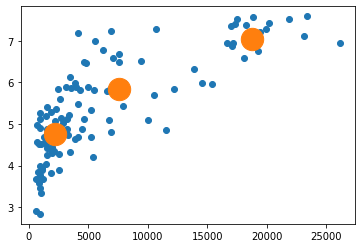

In [ ]:
plt.scatter(income, happy)

plt.scatter(clusters[:,0], clusters[:,1], s=500)